In [62]:
from github import Github
import networkx as nx
import pickle
from operator import itemgetter
import numpy as np
import community
import community
import matplotlib.pyplot as plt

In [45]:
# Object type: Dictionary
# Key: Name of crypto currency (eg 'bitcoin', 'ethereum')
# Value: List of PyGitHub user objects of users who stared the repo
# PyGitHub Repo Object docs: http://pygithub.readthedocs.io/en/latest/github_objects/NamedUser.html
with open(r'./crypto_stargazers_dict.pickle', 'rb') as handle:
    crypto_stargazers_dict = pickle.load(handle)

In [46]:
# Object type: Dictionary
# Key: Name of crypto currency (eg 'bitcoin', 'ethereum')
# Value: PyGitHub repo objects
# PyGitHub User Object docs: http://pygithub.readthedocs.io/en/latest/github_objects/Repository.html
with open(r'./crypto_repo_dict.pickle', "rb") as handle:
    crypto_repo_dict = pickle.load(handle)

In [47]:
# Object type: NetworkX Graph
# Nodes
#   Type 1) Name of crypto-currency (eg 'bitcoin', 'ethereum')
#   Type 2) Github usernames of people who starred crypto - repositories (eg johannesostner, shasafoster)
# Edges
#   There is an edge between a user and a repo if the user starred the repo
with open(r'./G.pickle', 'rb') as handle:
    G = pickle.load(handle)

In [51]:
print('There are ' + str(len(G.nodes())) + ' total nodes in our graph')
print('There are ' + str(len(crypto_stargazers_dict)) + ' valid crypto-currency repository nodes in our graph')
print('There are ' + str(len(G.edges())) + ' edges in our graph')

There are 41139 total nodes in our graph
There are 395 valid crypto-currency repository nodes in our graph
There are 57459 edges in our graph


Find the maximum and minium degree

In [32]:
degree_list = G.degree()
max_degree = max(degree_list, key=itemgetter(1))
min_degree = min(degree_list, key=itemgetter(1))
print('Crypto-currency with highest degree (' + str(max_degree[1]) + ') is ' + max_degree[0])
print('Crypto-currency with lowest degree (' + str(min_degree[1]) + ') is ' + min_degree[0])

Crypto-currency with highest degree (19193) is bitcoin
Crypto-currency with lowest degree (1) is ELLIOTTCABLE


Inspect the community structure of the network

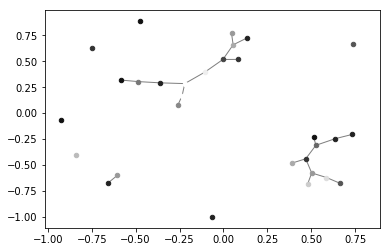

In [66]:
# first compute the best partition
from community import community_louvain
partition = community_louvain.best_partition(G)

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()